### Experimenting with SimpleRNN from https://www.tensorflow.org/api_docs/python/tf/keras/layers/SimpleRNN

In [13]:
import numpy as np
import tensorflow as tf

inputs = np.random.random([32, 10, 8]).astype(np.float32)

np.set_printoptions(precision=2)
inputs[0]

array([[0.31, 0.29, 0.05, 0.9 , 0.3 , 0.8 , 0.18, 0.93],
       [0.02, 0.15, 0.61, 0.65, 0.97, 0.76, 0.78, 0.34],
       [0.87, 0.95, 0.82, 0.28, 0.55, 0.36, 0.29, 0.02],
       [0.31, 0.95, 0.59, 0.26, 0.93, 0.03, 0.39, 0.35],
       [0.75, 0.05, 0.38, 0.  , 0.09, 0.54, 0.85, 0.67],
       [0.73, 0.39, 0.31, 0.16, 0.4 , 0.98, 0.42, 0.24],
       [0.3 , 0.29, 0.72, 0.2 , 0.78, 0.31, 0.44, 0.99],
       [0.46, 0.5 , 0.14, 0.86, 0.95, 0.72, 0.51, 0.98],
       [0.09, 0.23, 0.82, 0.67, 0.09, 0.65, 0.63, 0.89],
       [0.51, 0.55, 0.77, 0.49, 0.92, 0.62, 0.09, 0.14]], dtype=float32)

In [14]:
inputs.shape

(32, 10, 8)

In [15]:
simple_rnn = tf.keras.layers.SimpleRNN(4)

output = simple_rnn(inputs)  # The output has shape `[32, 4]`.
print('output.shape =', output.shape)

output.shape = (32, 4)


In [16]:
simple_rnn = tf.keras.layers.SimpleRNN(4, return_sequences=True, return_state=True)

# whole_sequence_output has shape `[32, 10, 4]`.
# final_state has shape `[32, 4]`.
whole_sequence_output, final_state = simple_rnn(inputs)
print('whole_sequence_output.shape =', whole_sequence_output.shape)
print('final_state.shape =', final_state.shape)

whole_sequence_output.shape = (32, 10, 4)
final_state.shape = (32, 4)


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Dropout
from IPython.display import display

In [18]:
model = Sequential()
model.add(SimpleRNN(units=10, input_shape=(4, 2), activation='relu'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 10)                130       
                                                                 
Total params: 130 (520.00 Byte)
Trainable params: 130 (520.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


,0
0,0.044489
1,0.043304
2,0.055547
3,-0.046178
4,-0.016043


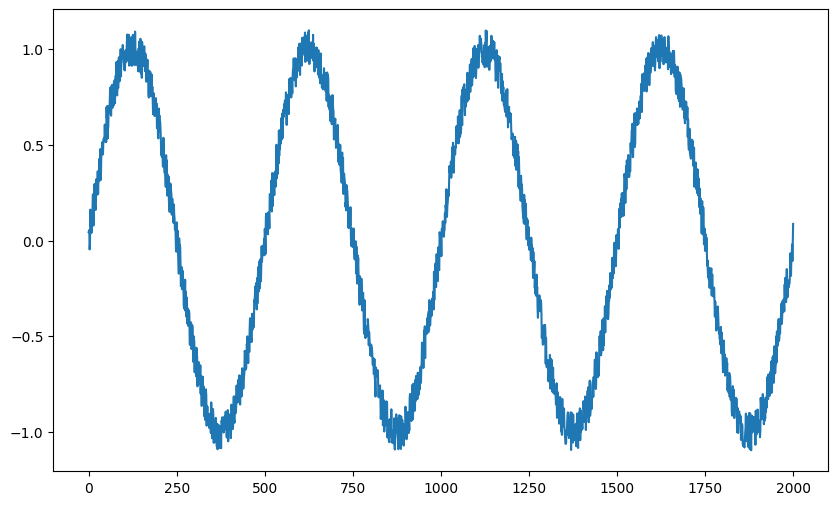

In [19]:
n_samples = 10000
n_periods = 20
phase_value = n_samples // n_periods

t = np.arange(0, n_samples)
x = np.sin(2*np.pi*t/phase_value) + 0.2 * (np.random.rand(n_samples)-0.5) # + np.sin(0.5*t/phase_value)
df = pd.DataFrame(x)
display(df.head())

plt.subplots(figsize=(10, 6))
plt.plot(df[:2000])
plt.show()

In [20]:
split_test_partition = int(0.8*n_samples)
train, test = df.values[0:split_test_partition, :], df.values[split_test_partition:, :]

#### Create a Sequence Data

In [21]:
window_size = 10

def sequenceData(data, window_size):
    X, y = [], []
    for i in range(len(data)-window_size):
        d = i + window_size
        X.append(data[i:d, ])
        y.append(data[d, ])
    return np.array(X), np.array(y)

X_train, y_train = sequenceData(train, window_size)
X_test, y_test = sequenceData(test, window_size)

In [22]:
X_train = X_train.reshape(-1, window_size, 1)
X_test = X_test.reshape(-1, window_size, 1)

In [32]:
model = Sequential()
model.add(SimpleRNN(units=16, input_shape=(None, 1), activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

lr_scheduler = tf.keras.optimizers.schedules.InverseTimeDecay(
    0.001, decay_rate=1e-6, decay_steps=1, staircase=False)
opt = tf.keras.optimizers.Adam(learning_rate=lr_scheduler)

model.compile(loss='mean_squared_error', optimizer=opt)
model.summary()

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_10 (SimpleRNN)   (None, 16)                288       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 433 (1.69 KB)
Trainable params: 433 (1.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.0568 - val_loss: 0.0063
Epoch 2/10
250/250 [==============================] - 0s

63/63 [==============================] - 0s 650us/step


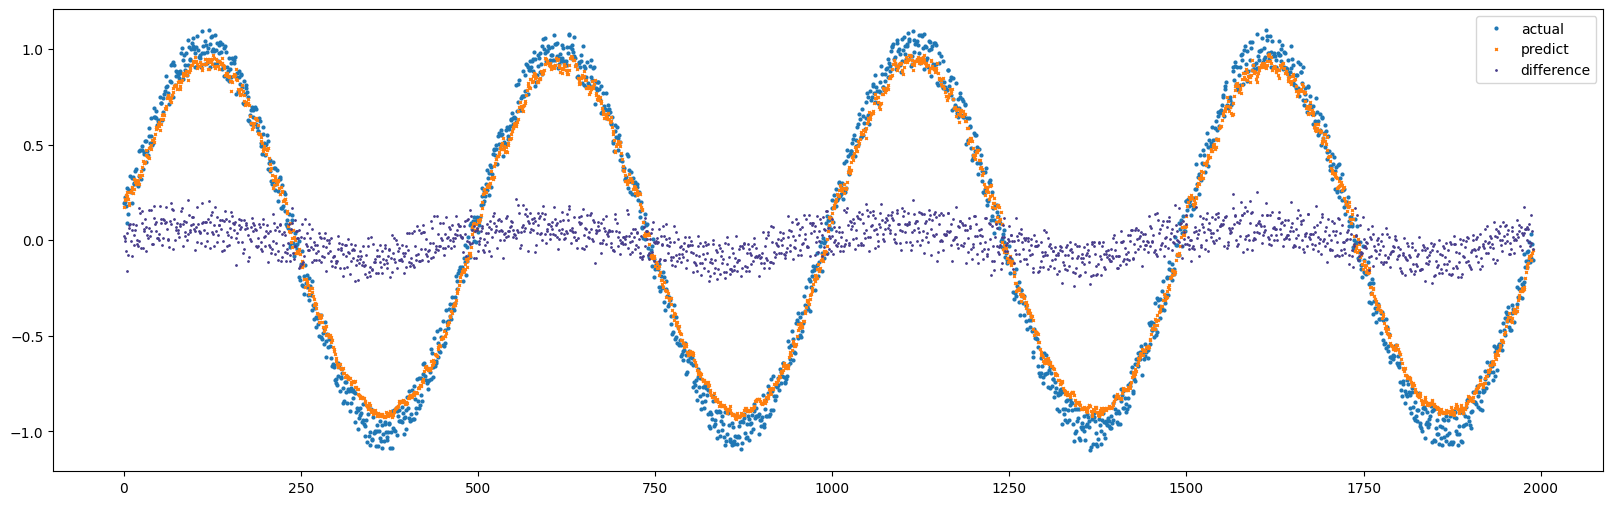

In [29]:
y_pred = model.predict(X_test)

fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(y_test, 'o', markersize=2, label='actual')
plt.plot(y_pred, 'x', markersize=2, label='predict')
plt.plot(y_test - y_pred, '.', markersize=2, label='difference', color='darkslateblue')
ax.legend(loc='best')
plt.show()